In [1]:
import main as vb
import numpy as np
import importlib
import matplotlib.pyplot as plt
import pandas as pd
importlib.reload(vb)

<module 'main' from '/home/theo/Documents/MVA/bayesian_project/main.py'>

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Data generation

In [3]:
n, p, s = 1000, 2000, 200

theta_generative = 10*np.ones(p)
theta_generative[s:] = 0
X = np.random.normal(0, 1, size=(n, p))
Y = X @ theta_generative


In [4]:
theta_generative

array([10., 10., 10., ...,  0.,  0.,  0.])

# Laplace prior Slabs

In [5]:
# initialize
mu_0 = vb.mu_0(X, Y)
sigma_0 = 2*np.random.random(p)
gamma_0 = np.random.random(p)

mu_laplace, sigma_laplace, gamma_laplace = vb.variational_laplace(X, Y, sigma_0, gamma_0, mu_0, a0=1, b0=p, lamb=1, eps=1e-5, max_it=30000)

  0%|          | 0/30000 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Experiment 1

In [29]:
n, p, s = 100, 200, 20
orders = ['priority', 'lexicographical', 'random']
placement = ['start', 'end', 'middle', 'random']

In [40]:

theta_generative = 10*np.ones((p, 4))
theta_generative[s:, 0] = 0
theta_generative[:-s, 1] = 0
theta_generative[110:, 2] = 0
theta_generative[:90, 2] = 0
np.random.seed(0)
theta_generative[np.random.choice(p, size=p-s, replace=False), 3] = 0

X = np.random.normal(0, 1, size=(n, p))
Y = X @ theta_generative


In [45]:
# results = list()
# for i, place in enumerate(placement):
i=2
place = 'middle'
Y_i = Y[:, i]
for order in orders:
    # initialize
    mu_0 = vb.mu_0(X, Y_i)
    sigma_0 = 2*np.random.random(p)
    gamma_0 = np.random.random(p)
    
    mu_laplace, sigma_laplace, gamma_laplace = vb.variational_laplace(X, 
                                                                        Y_i, 
                                                                        sigma_0, 
                                                                        gamma_0, 
                                                                        mu_0, 
                                                                        a0=1, 
                                                                        b0=p, 
                                                                        lamb=1,
                                                                        order=order, 
                                                                        eps=1e-5, 
                                                                        max_it=30000)   

    parametre = np.array([mu_laplace, sigma_laplace, gamma_laplace])
    np.save(f'results/experiement1/parametre_{order}_{place}.npy', parametre)

  2%|▏         | 671/30000 [15:22<11:12:16,  1.38s/it]


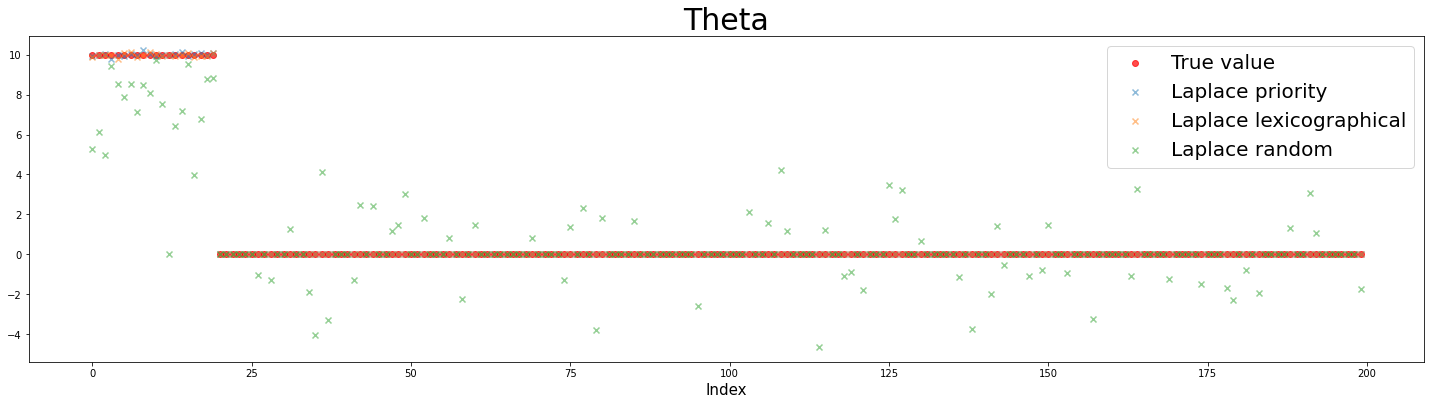

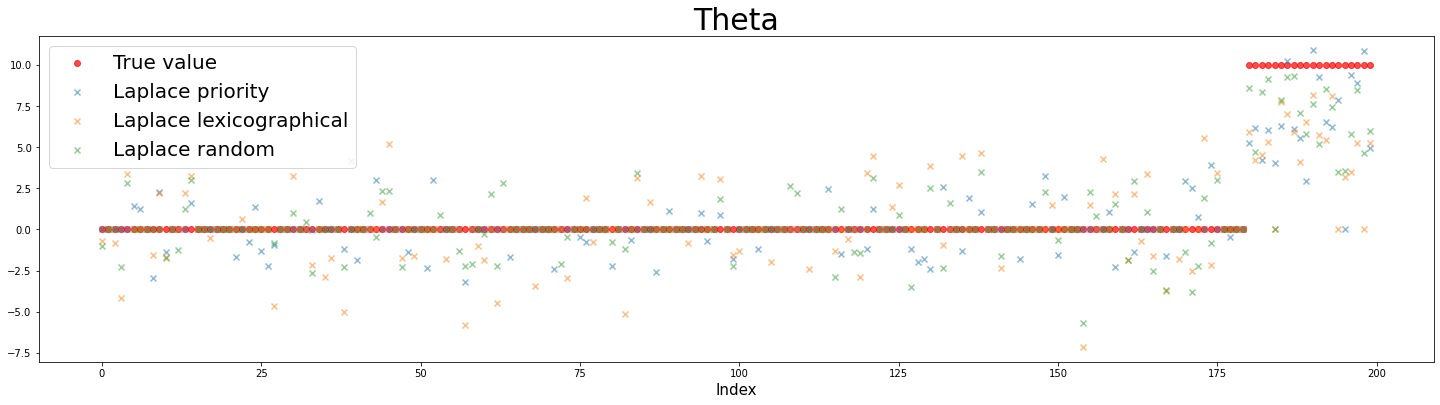

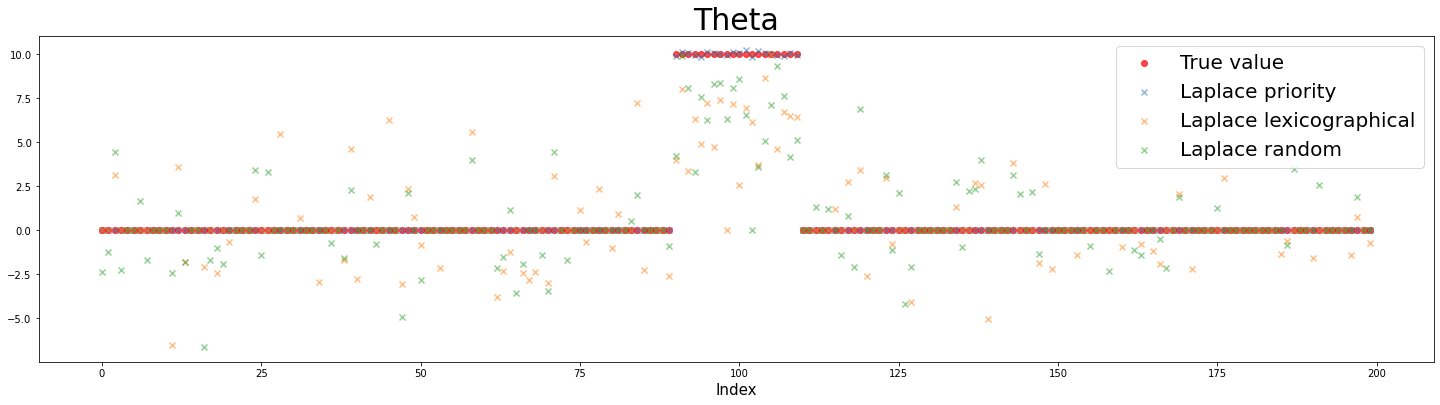

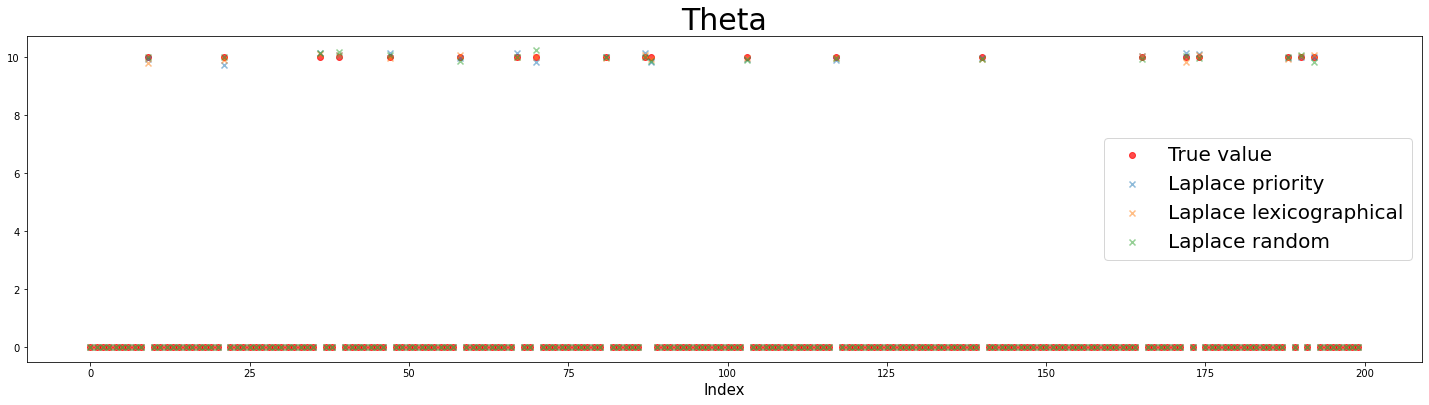

In [46]:
for i, place in enumerate(placement):
    fig = plt.figure(figsize=(25,6))
    plt.scatter(np.arange(len(theta_generative[:, i])), theta_generative[:, i], color='red', marker='o', alpha=0.7, label='True value')
    for order in orders:
        parametre = np.load(f'results/experiement1/parametre_{order}_{place}.npy')
        theta_laplace = parametre[2] * np.random.normal(parametre[0], parametre[1])
        plt.scatter(np.arange(len(theta_laplace)), theta_laplace, marker='x', alpha=0.5, label=f'Laplace {order}')
        plt.legend(fontsize=20)
    plt.title('Theta', size=30)
    plt.xlabel('Index',size=15)
    fig.savefig(f'results/experiement1/{place}_plot.pdf', bbox_inches='tight')

# Experiment 2

## Data generation

In [3]:
n, p, s = 100, 200, 20

theta_generative = 10*np.ones(p)
theta_generative[s:] = 0
X = np.random.normal(0, 1, size=(n, p))
Y = X @ theta_generative


## Laplace prior Slabs

In [4]:
# initialize
mu_0 = vb.mu_0(X, Y)
sigma_0 = 2*np.random.random(p)
gamma_0 = np.random.random(p)

mu_laplace, sigma_laplace, gamma_laplace = vb.variational_laplace(X, Y, sigma_0, gamma_0, mu_0, a0=1, b0=p, lamb=1, eps=1e-5, max_it=1000)

 20%|██        | 202/1000 [04:32<17:56,  1.35s/it]


In [5]:
counts_laplace = np.unique(gamma_laplace == 1, return_counts=True)
counts_laplace

(array([False,  True]), array([180,  20]))

In [6]:
theta_laplace = gamma_laplace * np.random.normal(mu_laplace, sigma_laplace)
results_laplace = X @ theta_laplace

# Gaussian prior Slabs

In [8]:
# initialize
mu_0 = vb.mu_0(X, Y)
sigma_0 = 10*np.random.random(p)
gamma_0 = np.random.random(p)

mu_gaussian, sigma_gaussian, gamma_gaussian = vb.variational_gaussian(X, Y, sigma_0, gamma_0, mu_0, a0=1, b0=p, lamb=1, eps=1e-5, max_it=1000)

 16%|█▌        | 158/1000 [00:08<00:45, 18.70it/s]


In [9]:
counts_gaussian = np.unique(gamma_gaussian == 1, return_counts=True)
counts_gaussian

(array([False,  True]), array([ 81, 119]))

In [10]:
theta_gaussian = gamma_gaussian * np.random.normal(mu_gaussian, sigma_gaussian)
results_gaussian = X @ theta_gaussian

# Comparison

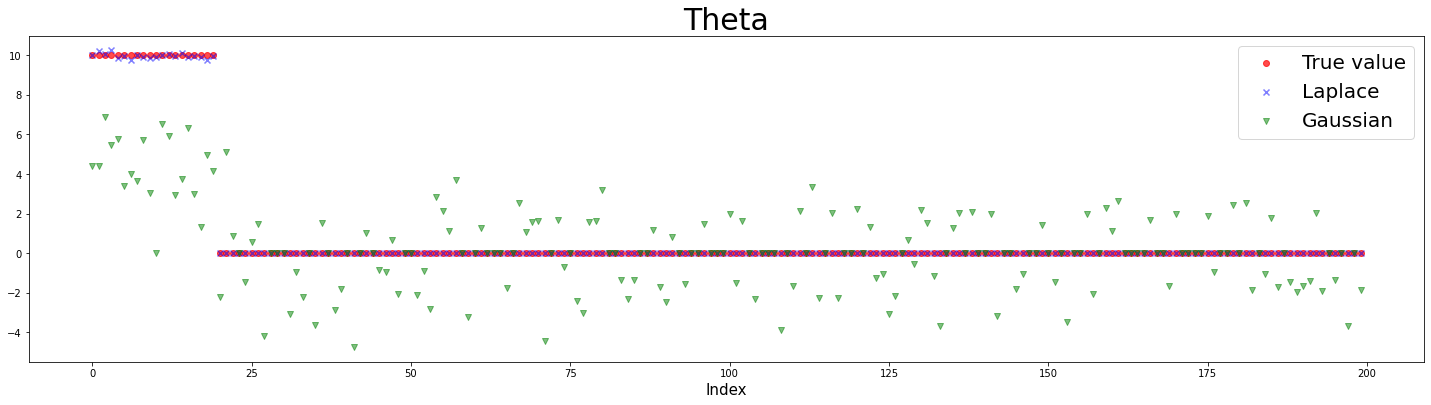

In [22]:
fig = plt.figure(figsize=(25,6))
plt.scatter(np.arange(len(theta_generative)), theta_generative, color='red', marker='o', alpha=0.7, label='True value')
plt.scatter(np.arange(len(theta_laplace)), theta_laplace, color='blue', marker='x', alpha=0.5, label='Laplace')
plt.scatter(np.arange(len(theta_gaussian)), theta_gaussian, color='green', marker='v', alpha=0.5, label='Gaussian')
plt.legend(fontsize=20)
plt.title('Theta', size=30)
plt.xlabel('Index',size=15)
fig.savefig('results/experiment2/theta_laplace_vs_gaussian.pdf', bbox_inches='tight')
plt.show()

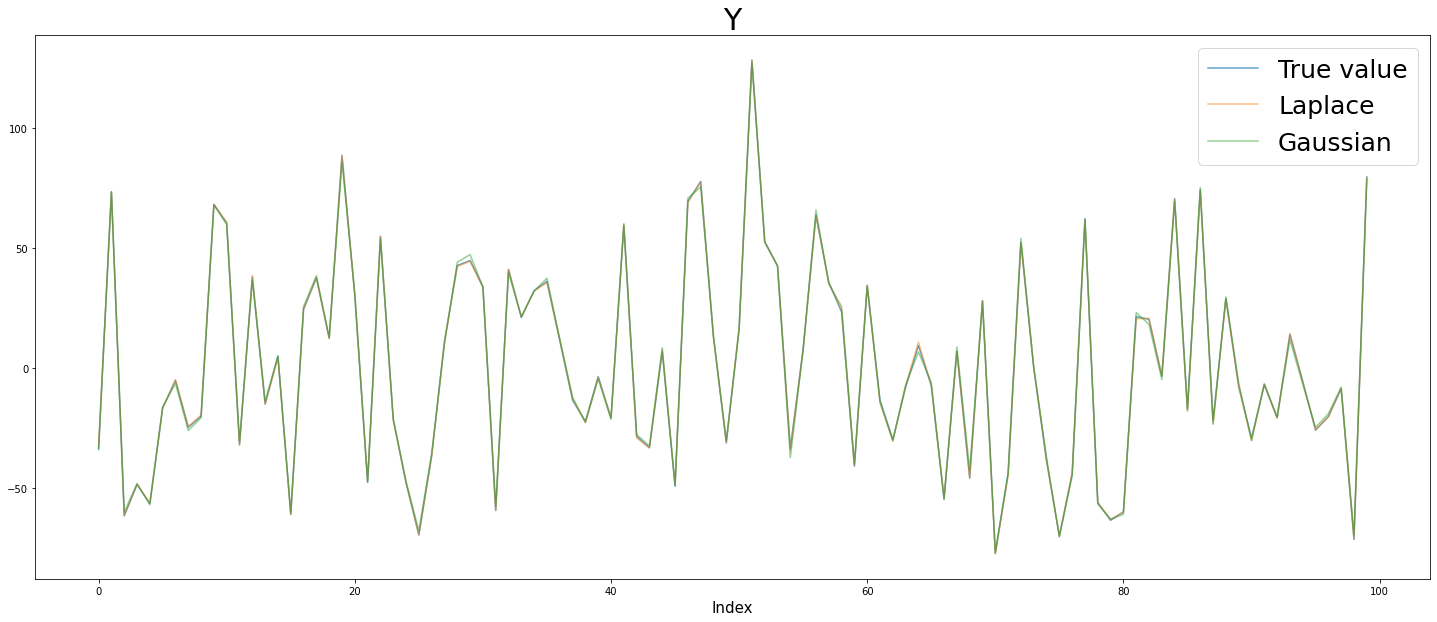

In [23]:
fig = plt.figure(figsize=(25,10))
plt.plot(Y, alpha=0.7, label='True value')
plt.plot(results_laplace, alpha=0.5, label='Laplace')
plt.plot(results_gaussian, alpha=0.5, label='Gaussian')
plt.legend(fontsize=25)
plt.title('Y', size=30)
plt.xlabel('Index',size=15)
fig.savefig('results/experiment2/reconstruction_laplace_vs_gaussian.pdf', bbox_inches='tight')

plt.show()

$\implies$ Hard to distinguish

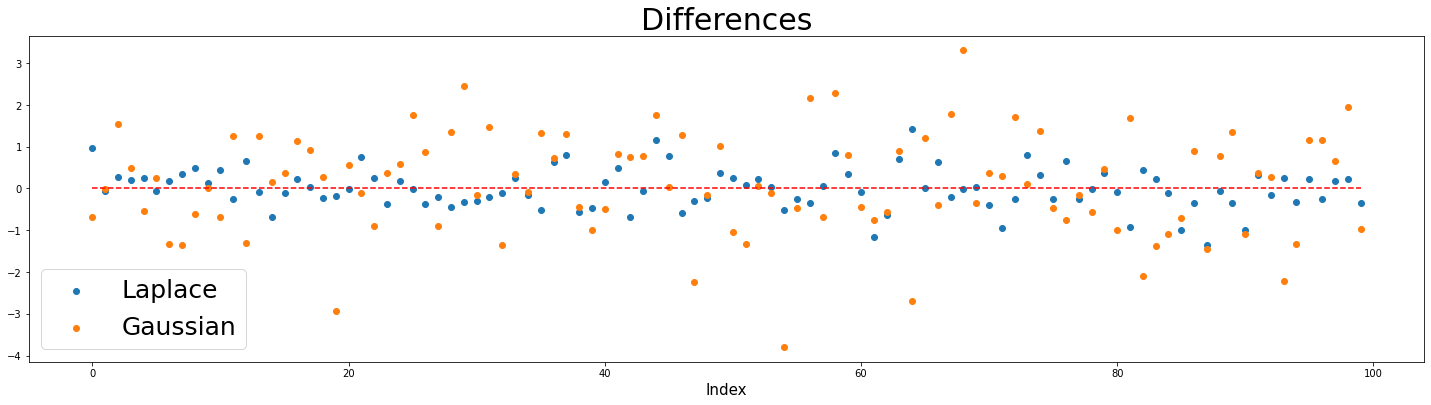

In [24]:
fig = plt.figure(figsize=(25,6))
#plt.plot(Y, color='red', alpha=0.7, label='True value')
plt.scatter(range(len(results_gaussian)),results_laplace - Y, label='Laplace')
plt.scatter(range(len(results_gaussian)),results_gaussian - Y, label='Gaussian')
plt.plot(range(len(results_gaussian)), np.zeros(len(results_gaussian)), '--', color='red')
plt.legend(fontsize=25)
plt.title('Differences', size=30)
plt.xlabel('Index',size=15)
fig.savefig('results/experiment2/difference_laplace_vs_gaussian.pdf', bbox_inches='tight')

plt.show()

In [25]:
l2_loss_laplace = np.sum((Y - results_laplace)**2)/np.linalg.norm(Y)
l2_loss_gaussian = np.sum((Y - results_gaussian)**2)/np.linalg.norm(Y)

In [26]:
l2_loss_laplace

0.05533800234628041

In [27]:
l2_loss_gaussian

0.35164908674251166